In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train=pd.read_csv("/content/drive/MyDrive/LGD-model/LGD_Class-Prep Data/X_trainS_LGD_C.csv")
X_test=pd.read_csv("/content/drive/MyDrive/LGD-model/LGD_Class-Prep Data/X_testS_LGD_C.csv")
y_train=pd.read_csv("/content/drive/MyDrive/LGD-model/LGD_Class-Prep Data/y_train_LGD_C.csv")
y_test=pd.read_csv("/content/drive/MyDrive/LGD-model/LGD_Class-Prep Data/y_test_LGD_C.csv")

In [ ]:
#Sanity check
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(199023, 102)
(199023, 2)
(49756, 102)
(49756, 2)


In [ ]:
X_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs',
       ...
       '('purpose', 'purpose_other')',
       '('purpose', 'purpose_renewable_energy')',
       '('purpose', 'purpose_small_business')',
       '('purpose', 'purpose_vacation')',
       '('initial_list_status', 'initial_list_status_f')',
       '('application_type', 'application_type_Individual')',
       '('hardship_flag', 'hardship_flag_N')',
       '('disbursement_method', 'disbursement_method_Cash')',
       '('debt_settlement_flag', 'debt_settlement_flag_N')',
       '('debt_settlement_flag', 'debt_settlement_flag_Y')'],
      dtype='object', length=102)

In [ ]:
X_test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs',
       ...
       '('purpose', 'purpose_other')',
       '('purpose', 'purpose_renewable_energy')',
       '('purpose', 'purpose_small_business')',
       '('purpose', 'purpose_vacation')',
       '('initial_list_status', 'initial_list_status_f')',
       '('application_type', 'application_type_Individual')',
       '('hardship_flag', 'hardship_flag_N')',
       '('disbursement_method', 'disbursement_method_Cash')',
       '('debt_settlement_flag', 'debt_settlement_flag_N')',
       '('debt_settlement_flag', 'debt_settlement_flag_Y')'],
      dtype='object', length=102)

In [ ]:
y_train.columns

Index(['Unnamed: 0', 'recovery_rate_0_1'], dtype='object')

In [ ]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199023 entries, 0 to 199022
Data columns (total 102 columns):
 #    Column                                                          Dtype  
---   ------                                                          -----  
 0    Unnamed: 0                                                      int64  
 1    Unnamed: 0.1                                                    float64
 2    loan_amnt                                                       float64
 3    funded_amnt                                                     float64
 4    funded_amnt_inv                                                 float64
 5    int_rate                                                        float64
 6    installment                                                     float64
 7    annual_inc                                                      float64
 8    dti                                                             float64
 9    delinq_2yrs             

In [ ]:
X_train=X_train.drop(["Unnamed: 0", "Unnamed: 0.1","recoveries","total_rec_prncp","total_rec_int","total_rec_late_fee","collection_recovery_fee",
                      "('loan_status', 'loan_status_Charged Off')","('loan_status', 'loan_status_Default')","('loan_status', 'loan_status_In Grace Period')",
                      "('initial_list_status', 'initial_list_status_f')","('application_type', 'application_type_Individual')","('hardship_flag', 'hardship_flag_N')",
                      "('disbursement_method', 'disbursement_method_Cash')","('debt_settlement_flag', 'debt_settlement_flag_N')","('debt_settlement_flag', 'debt_settlement_flag_Y')"],axis=1)
y_train=y_train.drop("Unnamed: 0",axis=1)
X_test=X_test.drop(["Unnamed: 0", "Unnamed: 0.1","recoveries","total_rec_prncp","total_rec_int","total_rec_late_fee","collection_recovery_fee",
                      "('loan_status', 'loan_status_Charged Off')","('loan_status', 'loan_status_Default')","('loan_status', 'loan_status_In Grace Period')",
                      "('initial_list_status', 'initial_list_status_f')","('application_type', 'application_type_Individual')","('hardship_flag', 'hardship_flag_N')",
                      "('disbursement_method', 'disbursement_method_Cash')","('debt_settlement_flag', 'debt_settlement_flag_N')","('debt_settlement_flag', 'debt_settlement_flag_Y')"],axis=1)
y_test=y_test.drop("Unnamed: 0",axis=1)

In [ ]:
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression() #c=1 default we can set 0.01 or 100

# fit the model
logreg.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test,y_test)))

Accuracy on training set: 0.712
Accuracy on test set: 0.708


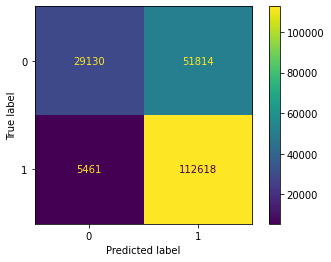

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_train, y_train)  
plt.show()

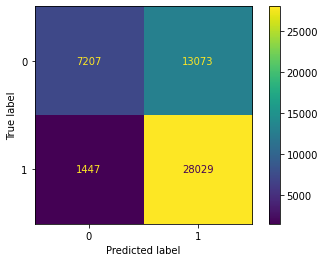

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()

In [ ]:
y_pred=logreg.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.7434250595447878
Recall: 0.7081758983841144
F1 Score: 0.6735822717784127


In [ ]:
import pickle

Pkl_Filename = "Pickle_LR_Model1_LGD_C.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 10, n_estimators= 100,random_state=42)

gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train))) 
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.831
Accuracy on test set: 0.751


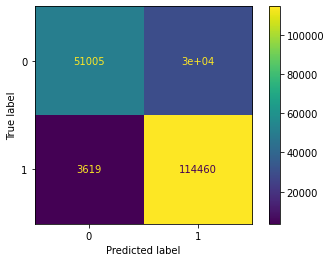

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbrt, X_train, y_train)  
plt.show()

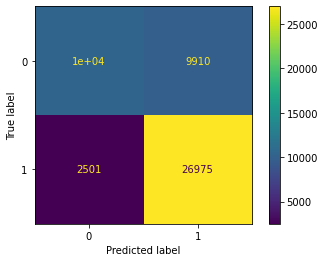

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbrt, X_test, y_test)  
plt.show()

In [ ]:
y_pred=gbrt.predict(X_test)

from sklearn.metrics import precision_score
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Precision: 0.7616354615677191
Recall: 0.7505627462014631
F1 Score: 0.7366135161761213


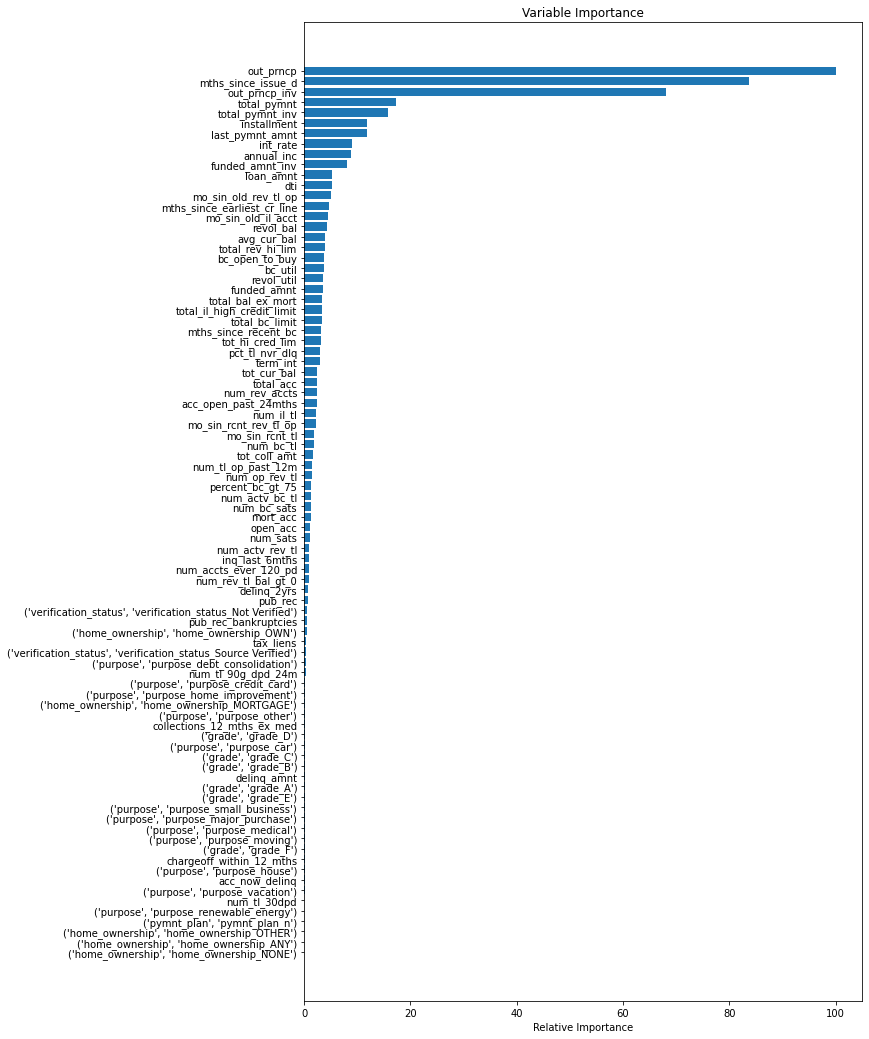

In [ ]:
feature_importance = gbrt.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
import pickle

Pkl_Filename = "Pickle_GB_Model_LGD2_C.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gbrt, file)

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb= XGBClassifier(
 learning_rate= 0.1,
 max_depth= 10,
 n_estimators=100,random_state=42)

xgb.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(xgb.score(X_train,y_train))) 
print("Accuracy on test set: {:.3f}".format(xgb.score(X_test,y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.751


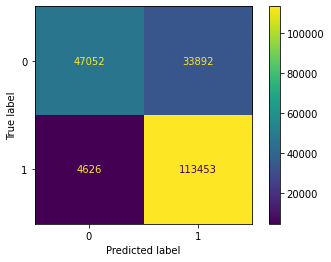

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_train, y_train)  
plt.show()

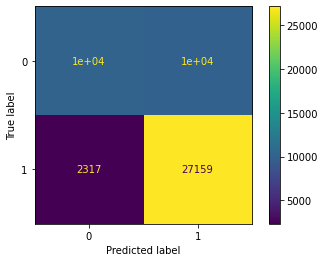

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()

In [ ]:
import pickle

Pkl_Filename = "Pickle_XGB_Model_LGD2_C.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb, file)

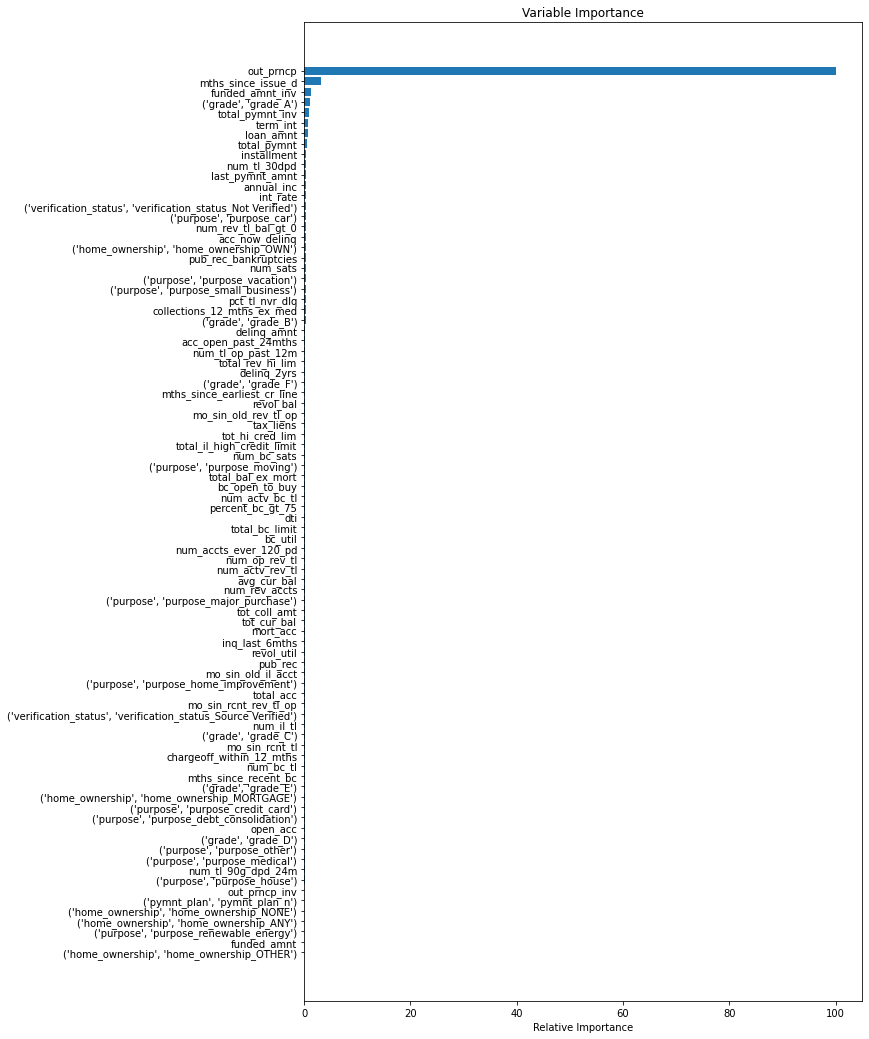

In [ ]:
feature_importance = xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()